# K- nearest neighbors

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor as knn

In [ ]:
#Let's load the election dataframe

url = 'https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1127/trump_data.csv'
df = pd.read_csv(url,encoding='latin-1',index_col=0)
df = df.dropna(subset=['income'])

In [ ]:
#Let's make the log population


df['lnpop']=np.log(df['population'])

What K-NN does is find the K closest neighbors in terms of $X$ for a given row and take the average of the respecrive values of $y$ to establish its prediction.

By closest we mean those with the smallest euclidian distance (square difference). 



In [ ]:
sklearn_knn = knn(n_neighbors=150).fit(X=df[['lnpop']],
                                       y=df['trump_share'])


In [ ]:
#score (R squared equivalent)
sklearn_knn.score(X=df[['lnpop']],
                  y=df['trump_share'])

In [ ]:
df['pred_knn'] = sklearn_knn.predict(df[['lnpop']])


In [ ]:
#plot
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='pred_knn'), color='darkorange' )+
 theme_bw()
       )


In [ ]:
(ggplot(df, aes(x='population', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='population', y='pred_knn'), color='darkorange' )+
 theme_bw()
       )

In [ ]:
sklearn_knn.predict([[np.log(10010)]])

In [ ]:
sklearn_knn.predict([[np.log(10020)]])

In [ ]:
#we can change the number of neighbors

sklearn_knn2 = knn(n_neighbors=80).fit(X=df[['lnpop']],
                                       y=df['trump_share'])


In [ ]:
sklearn_knn2.score(X=df[['lnpop']],
                   y=df['trump_share'])

In [ ]:
df['pred_knn2'] = sklearn_knn2.predict(df[['lnpop']])


In [ ]:
#plot
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='pred_knn2'), color='darkorange' )+
 theme_bw()
       )

## Overfitting
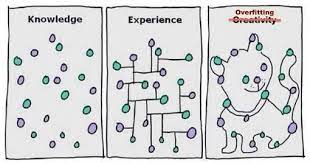

Something really odd is happening, our score increased when we reduced the number of neighbors, but the prediction line seems shakier. This does not seem all that encouraging. It could mean that the model is taking noise in, such that even if it fits the points we have given it a bit too well. But that means, that if we feed it new data it has never seen, our result is likely to be poor!


We will address this later! But for now let's try some other interesting methods

## Decision trees

Decision trees are interesting because they use the values in the variable $X$ to find the one in the training data that gives the closest values possible based on what is seen.

It does so by making tree separations in a yes/no fashion. Consider the plot below as an example:

![Tree](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-17-at-00.09.26.png)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR=DecisionTreeRegressor().fit(X=df[['lnpop']],
                              y=df['trump_share'])

In [ ]:
DTR.score(X=df[['lnpop']],
                y=df['trump_share'])

In [ ]:
df['pred_DTR']=DTR.predict(X=df[['lnpop']])

In [ ]:
#plot
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='pred_DTR'), color='darkorange' )+
 theme_bw()
       )

We are **definitely** overfitting

## Can multiple decision trees averaged out do better? Random Forests!

Random forests run several decision trees by taking random subsets of rows of our data, running decision trees on them and then averaging the predictions!


In [ ]:
from sklearn.ensemble import RandomForestRegressor as rf

In [ ]:
sklearn_rf = rf(n_estimators=100,
                max_depth=3).fit(df[['lnpop']],
                                 df['trump_share'])


In [ ]:
sklearn_rf.score(df[['lnpop']],
                 df['trump_share'])

In [ ]:
df['pred_rf'] = sklearn_rf.predict(df[['lnpop']])


In [ ]:
#plot
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='pred_rf'), color='darkorange' )+
 theme_bw()
       )